# Assignment 1
## Question `1` (K-Nearest Neighbour)

| | |
|-|-|
| Course | Statistical Methods in AI |
| Release Date | `19.01.2023` |
| Due Date | `29.01.2023` |

### Instructions:
1.   Assignment must be implemented using python notebook only (Colab , VsCode , Jupyter etc.)
2.   You are allowed to use libraries for data preprocessing (numpy, pandas, nltk etc) and for algorithms as well (sklearn etc). You are not however allowed to directly use classifier models.
3.   The performance of the model will hold weightage but you will also be graded largely for data preprocessing steps , explanations , feature selection for vectors etc.
4.   Strict plagiarism checking will be done. An F will be awarded for plagiarism.

### The Dataset
The dataset is to be downloaded from the following drive link ([Link](https://drive.google.com/file/d/1u55iIrTrn41n2lv8HBjtdKLhDcy_6s7O/view?usp=sharing)).
The dataset is a collection of *11099 tweets and has 31 columns*. The data will be in the form of a csv file which you can load in any format. The ground truth is available in the following drive link ([Link](https://drive.google.com/file/d/1--cozM5hXDwdbbDaWlB-8NqwSj0nh1Kg/view?usp=sharing)) which corresponds to whether a tweet was popular or not. Since the task involves selecting features yourself to vectorize a tweet , we suggest some data analysis of the columns you consider important.
<br><br>

### The Task
You have to build a classifier which can predict the popularity of the tweet, i.e , if the tweet was popular or not. You are required to use **KNN** algorithm to build the classifier and cannot use any inbuilt classifier. All columns are supposed to be analyzed , filtered and preprocessed to determine its importance as a feature in the vector for every tweet (Not every column will be useful).<br>
The Data contains the **raw text of the tweet**(in the text column) as well as other **meta data** like likes count , user followers count. Note that it might be useful to **create new columns** with useful information. For example, *number of hashtags* might be useful but is not directly present as a column.<br>
There are 3 main sub parts:
1. *Vectorize tweets using only meta data* - likes , user followers count , and other created data
2. *Vectorize tweets using only it's text*. This segment will require NLP techniques to clean the text and extract a vector using a BoW model. Here is a useful link for the same - [Tf-Idf](https://towardsdatascience.com/text-vectorization-term-frequency-inverse-document-frequency-tfidf-5a3f9604da6d). Since these vectors will be very large , we recommend reducing their dimensinality (~10 - 25). Hint: [Dimentionality Reduction](https://jonathan-hui.medium.com/machine-learning-singular-value-decomposition-svd-principal-component-analysis-pca-1d45e885e491). Please note that for this also you are allowed to use libraries.

3. *Combining the vectors from above two techinques to create one bigger vector*
<br>


Using KNN on these vectors build a classifier to predict the popularity of the tweet and report accuracies on each of the three methods as well as analysis. You can use sklearn's Nearest Neighbors and need not write KNN from scratch. (However you cannot use the classifier directly). You are expected to try the classifier for different number of neighbors and identify the optimal K value.

# Colab Notebook
Please run this in google colab or similar

## Import necessary libraries

In [77]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import nltk
from nltk.stem.porter import *
import re
from sklearn.decomposition import PCA


## Load and display the data

In [78]:
# Colab stuff, can ignore in normal PC
from google.colab import drive
drive.mount('/content/drive')
!cp /content/drive/MyDrive/Tweets.csv .
!cp /content/drive/MyDrive/ground_truth.csv .

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [79]:
# Start from here 
df=pd.read_csv("Tweets.csv")
df.to_csv()
truths=pd.read_csv("ground_truth.csv",names=['truths'])
truths['truths'] = truths['truths'].astype(int)


## Exploratory Data Analysis
*This is an ungraded section but is recommended to get a good grasp on the dataset*

In [80]:
# your code here
df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11099 entries, 0 to 11098
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   created_at             11099 non-null  object 
 1   id                     11099 non-null  float64
 2   id_str                 11099 non-null  float64
 3   text                   11099 non-null  object 
 4   truncated              11099 non-null  bool   
 5   entities               11099 non-null  object 
 6   metadata               11099 non-null  object 
 7   source                 11099 non-null  object 
 8   is_quote_status        11099 non-null  bool   
 9   retweet_count          11099 non-null  int64  
 10  favorite_count         11099 non-null  int64  
 11  lang                   11099 non-null  object 
 12  user_name              11099 non-null  object 
 13  user_screen_name       11099 non-null  object 
 14  user_followers_count   11099 non-null  int64  
 15  us

Index(['created_at', 'id', 'id_str', 'text', 'truncated', 'entities',
       'metadata', 'source', 'is_quote_status', 'retweet_count',
       'favorite_count', 'lang', 'user_name', 'user_screen_name',
       'user_followers_count', 'user_friends_count', 'user_listed_count',
       'user_created_at', 'user_favourites_count', 'user_verified',
       'user_statuses_count'],
      dtype='object')

In [81]:
# Add a column for hashtags
import ast
hashtags=[]
places=[]
for i in df.index:
  hashtags.append(len(ast.literal_eval(df['entities'][i])['hashtags']))
  # for text in df['entities'][i]['hashtags']:
  #   print(text)
print(hashtags)
df['hashtags']=hashtags


[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 6, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 3, 1, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 1, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 6, 1, 0, 0, 2, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 2, 2, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 

In [82]:
# change language to a number
lang=df['lang'].unique()
lang=lang.tolist()
res_dct = {lang[i]: 0 for i in range(0, len(lang))}
for i in df.index:
  res_dct[df['lang'][i]]=res_dct[df['lang'][i]]+1
# sort on importance of languages
lang_order=dict(sorted(res_dct.items(), key=lambda item: item[1]))
lang=list(lang_order)
for i in df.index:
  df['lang'][i]=lang.index(df['lang'][i])


<ipython-input-82-4b45d581bc0e>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lang'][i]=lang.index(df['lang'][i])


## Part-1
*Vectorize tweets using only meta data*

In [83]:
def get_features():
  """
  Funtion to return a matrix of dimensions (number of tweets, number of chosen features)
  Input parameters to this funcion are to be chosen as per requirement (Example: Loaded dataframe of the dataset) 
  """
  print(df.columns)
  x_df = df.drop(['is_quote_status','created_at', 'id', 'id_str', 'text', 'truncated', 'entities', 'metadata', 'source', 'user_name', 'user_screen_name', 'user_created_at'], axis=1)
  print(x_df.columns)

  # x=x_df.to_numpy()
  # y=truths.to_numpy()
  return x_df.to_numpy(),truths.to_numpy()

X,Y=get_features()


Index(['created_at', 'id', 'id_str', 'text', 'truncated', 'entities',
       'metadata', 'source', 'is_quote_status', 'retweet_count',
       'favorite_count', 'lang', 'user_name', 'user_screen_name',
       'user_followers_count', 'user_friends_count', 'user_listed_count',
       'user_created_at', 'user_favourites_count', 'user_verified',
       'user_statuses_count', 'hashtags'],
      dtype='object')
Index(['retweet_count', 'favorite_count', 'lang', 'user_followers_count',
       'user_friends_count', 'user_listed_count', 'user_favourites_count',
       'user_verified', 'user_statuses_count', 'hashtags'],
      dtype='object')


Perform KNN using the vector obtained from get_features() function. Following are the steps to be followed:
1. Normalise the vectors
2. Split the data into training and test to estimate the performance.
3. Fit the Nearest Neughbiurs module to the training data and obtain the predicted class by getting the nearest neighbours on the test data.
4. Report the accuracy, chosen k-value and method used to obtain the predicted class. Hint: Plot accuracies for a range of k-values. 

In [84]:
X=normalize(X)
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,random_state=41)


In [85]:
from sklearn.neighbors import NearestNeighbors
def define_knn(K,p,X_train):
  nbrs = NearestNeighbors(n_neighbors=K, algorithm='auto',metric='minkowski',p=p).fit(X_train)
  return nbrs
knn=define_knn(3,2,X_train)

def classification(KNN,X_test,Y_train):
    
    _,indices=KNN.kneighbors(X_test)
    l=[]
    for i in indices:
      one=0;zero=0;class_=0
      for index in i:
        if(Y_train[index][0]==0):
          zero+=1
        else:
          one+=1
      if(one>zero):
         class_=1
      l.append(class_)
    return l

l=classification(knn,X_test,Y_train)
acc = accuracy_score(Y_test, l)
acc

0.9531531531531532

# Exploiting different values of K

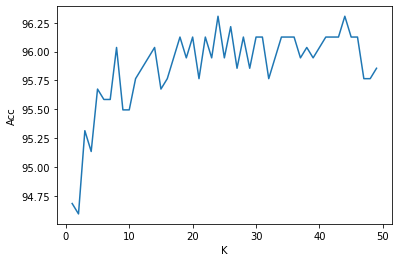

In [86]:
acc=[]
for k in range(1,50):
  knn=define_knn(k,2,X_train);
  l=classification(knn,X_test,Y_train)
  accu = accuracy_score(Y_test, l)
  acc.append(accu*100)
lol = np.arange(1,50)
plt.plot(lol,acc)
plt.xlabel("K")
plt.ylabel("Acc")

plt.show()

In [87]:
print(max(acc))

96.30630630630631


## Part-2
Vectorize tweets based on the text. More details and reference links can be checked on the Tasks list in the start of the notebook

In [88]:
!pip install Pystemmer
import nltk
try:
   nltk.download('stopwords')
except:
  pass

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [89]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from Stemmer import Stemmer
from nltk.corpus import stopwords

stemmer = Stemmer('porter')
stop_words = set(stopwords.words("english"))

def tokenise(text):
  text = re.sub(r'[^\x00-\x7F]+', ' ', text) # remove non ascii characters
  text = re.sub(r'<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});', ' ', text)
  text = re.sub('(http://[^ ]+)', ' ', text)
  text = re.sub('(https://[^ ]+)', ' ', text)  # removing http characters
  text = re.sub('&amp;|&apos;|&gt;|&lt;|&nbsp;|&quot;', ' ', text)
  wiki = re.split(r"[^A-Za-z0-9]+", text)
  wiki = [stemmer.stemWord(w)for w in wiki if not w.lower() in stop_words and len(
            w) < 30 and len(w) > 2 and (not w.isnumeric())]

        # wiki = wiki.split()
  return " ".join(wiki)
 
def tweet_vectoriser(train):
  tfidfvectorizer = TfidfVectorizer(analyzer='word',stop_words= 'english')
  tfidf_wm = tfidfvectorizer.fit_transform(train)
  tfidf_tokens = tfidfvectorizer.get_feature_names()
  lst = list(range(1,len(train)+1))

  # print(tfidf_tokens)
  df_tfidfvect = pd.DataFrame(data = tfidf_wm.toarray(),index = lst,columns = tfidf_tokens)
  return df_tfidfvect


twt_list=df['text'].to_list();
for i in range(len(twt_list)):
  twt_list[i]=tokenise(twt_list[i])
df_tfidfvect=tweet_vectoriser(twt_list)


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Perform KNN using the vector obtained from tweet_vectoriser() function. Following are the steps to be followed:

1. Normalise the vectors
2. Split the data into training and test to estimate the performance.
3. Fit the Nearest Neughbiurs module to the training data and obtain the predicted class by getting the nearest neighbours on the test data.
4. Report the accuracy, chosen k-value and method used to obtain the predicted class. Hint: Plot accuracies for a range of k-values.

In [90]:
tf_idf = np.array(df_tfidfvect)
Y = truths.to_numpy()
tf_idf = normalize(tf_idf)

# dimensionality reduction
pca = PCA(n_components=25)
pca.fit(tf_idf)
tf_idf = pca.transform(tf_idf)


In [91]:
X_train, X_test, Y_train, Y_test = train_test_split(tf_idf, Y, test_size=0.2, random_state=41)
print(len(X_train), len(X_test))


8879 2220


In [92]:
knn=define_knn(3,2,X_train);
l=classification(knn,X_test,Y_train)
print(set(l))
acc = accuracy_score(Y_test, l)
acc

{0, 1}


0.9288288288288288

Experimenting for different dimensions

In [93]:
acc=[]
# for i in range(20,50):
#   pca = PCA(n_components=i)
#   pca.fit(t1)
#   tdf_arr = pca.transform(t1)
# acc__=[]
X_train, X_test, Y_train, Y_test = train_test_split(tf_idf, Y, test_size=0.2, random_state=41)

for k in range(1,50):
    knn=define_knn(k,2,X_train);
    l=classification(knn,X_test,Y_train)
    acc_ = accuracy_score(Y_test, l)
    acc.append(acc_)


[0.918918918918919, 0.9328828828828829, 0.9288288288288288, 0.9382882882882883, 0.9342342342342342, 0.9351351351351351, 0.9288288288288288, 0.9324324324324325, 0.9288288288288288, 0.9315315315315316, 0.931981981981982, 0.9337837837837838, 0.931981981981982, 0.9337837837837838, 0.9342342342342342, 0.9324324324324325, 0.9328828828828829, 0.9324324324324325, 0.931981981981982, 0.9342342342342342, 0.9337837837837838, 0.9328828828828829, 0.9324324324324325, 0.9306306306306307, 0.931981981981982, 0.9306306306306307, 0.9306306306306307, 0.9288288288288288, 0.9261261261261261, 0.9288288288288288, 0.9288288288288288, 0.9292792792792792, 0.9310810810810811, 0.9310810810810811, 0.9310810810810811, 0.9310810810810811, 0.9310810810810811, 0.927027027027027, 0.927027027027027, 0.927027027027027, 0.927027027027027, 0.9247747747747748, 0.9247747747747748, 0.9247747747747748, 0.9247747747747748, 0.9247747747747748, 0.9247747747747748, 0.9247747747747748, 0.9247747747747748]


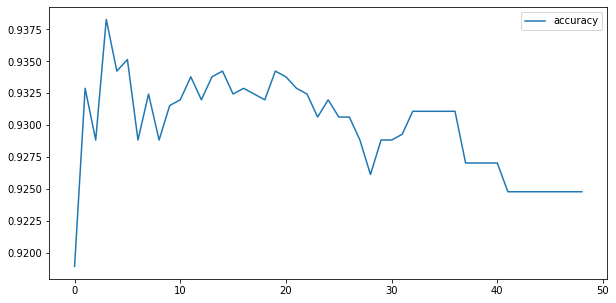

In [94]:
k=np.arange(1,50)
print(acc)
# for i in range(0,30):
plt.figure(figsize=(10,5))
# plt.plot(range(1,50),label='Test accuracy')
plt.plot(acc,label='accuracy')
plt.legend()
plt.show()

In [95]:
print(max(acc))

0.9382882882882883


## Part-3
### Subpart-1

Combine both the vectors obtained from the tweet_vectoriser() and get_features()

In [96]:
X=normalize(np.concatenate((X,tf_idf),axis=1))
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=41)

Perform KNN using the vector obtained in the previous step. Following are the steps to be followed:

1. Normalise the vectors
2. Split the data into training and test to estimate the performance.
3. Fit the Nearest Neughbiurs module to the training data and obtain the predicted class by getting the nearest neighbours on the test data.
4. Report the accuracy, chosen k-value and method used to obtain the predicted class. Hint: Plot accuracies for a range of k-values.

In [97]:

knn=define_knn(3,2,X_train)
l=classification(knn,X_test,Y_train)
acc = accuracy_score(Y_test, l)
acc

0.9432432432432433

In [98]:
acc=[]
for k in range(1,50):
    knn=define_knn(k,2,X_train);
    l=classification(knn,X_test,Y_train)
    acc_ = accuracy_score(Y_test, l)
    acc.append(acc_)


[0.9445945945945946, 0.9441441441441442, 0.9432432432432433, 0.9490990990990991, 0.9531531531531532, 0.9481981981981982, 0.9518018018018019, 0.9527027027027027, 0.9504504504504504, 0.9527027027027027, 0.9527027027027027, 0.9518018018018019, 0.9522522522522523, 0.9531531531531532, 0.9536036036036036, 0.9513513513513514, 0.9531531531531532, 0.9540540540540541, 0.9522522522522523, 0.9527027027027027, 0.9527027027027027, 0.9536036036036036, 0.9536036036036036, 0.9554054054054054, 0.9527027027027027, 0.9522522522522523, 0.9527027027027027, 0.9522522522522523, 0.9504504504504504, 0.95, 0.95, 0.9509009009009008, 0.9481981981981982, 0.9486486486486486, 0.9481981981981982, 0.9481981981981982, 0.9472972972972973, 0.9477477477477477, 0.9495495495495495, 0.9490990990990991, 0.9486486486486486, 0.9481981981981982, 0.9486486486486486, 0.95, 0.9477477477477477, 0.9490990990990991, 0.9481981981981982, 0.9486486486486486, 0.9490990990990991]


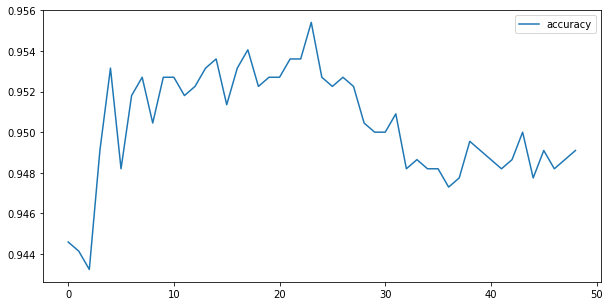

In [99]:
k=np.arange(1,50)
print(acc)
# for i in range(0,30):
plt.figure(figsize=(10,5))
plt.plot(acc,label='accuracy')
plt.legend()
plt.show()

In [100]:
print(max(acc))

0.9554054054054054


### Subpart-2

Explain the differences between the accuracies obtained in each part above based on the features used.

- For the metadata, we achieve a max accuracy of 96.3
- For text, we achieve a max accuracy of 93.55%.
- When the features are combined, we achieve an accuracy of 95.76%.
- From these observations, a number of conclusions can be drawn:

  - text is not as feature rich as the metadata. This could either be because of the innate nature of the text, or the the way the text has been tokenised.

  - metadata gives highest accuracy. when combined with text, the accuracy slightly decreases. this implies metadata in itself is of more significance in classifying tweets as popular or not, than the content of the tweets themselves.

- This can be because metadata gives binary values and values like follower count and likes are a bigger indicator than the text.